<a href="https://colab.research.google.com/github/gweilnid/Python-Notebooks-for-Data-AI-Projects/blob/main/Langgraph_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [22]:
from ast import List
class AgentState(TypedDict):
  name: str
  age: str
  skills: List
  final: str

In [41]:
def first_node(state:AgentState) -> AgentState:
  """This is the first node of our sequence"""
  state["final"] = f"Hi {state["name"]}."
  return state

def second_node(state:AgentState) -> AgentState:
  """This is the second node of our sequence"""
  state["final"] = state["final"] + f" You're {state["age"]} years old!"
  return state

def third_node(state:AgentState) -> AgentState:
  """This is the third node of our sequence"""
  state["final"] = state["final"] + f" You have skills in {state["skills"][:-1]} and {state["skills"][-1:]}"
  return state

In [42]:
graph = StateGraph(AgentState)
graph.add_node("first", first_node)
graph.add_node("second", second_node)
graph.add_node("third", third_node)

graph.set_entry_point("first")
graph.set_finish_point("second")
graph.add_edge("first", "second")
graph.add_edge("second", "third")
app = graph.compile()


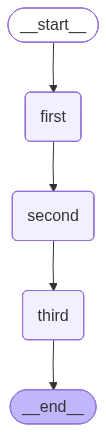

In [43]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [44]:
result = app.invoke({"name" : "Yasin", "age" : 25, "skills" : ["Python", "Machine Learning", "LanGraph"]})
print(result)

{'name': 'Yasin', 'age': 25, 'skills': ['Python', 'Machine Learning', 'LanGraph'], 'final': "Hi Yasin. You're 25 years old! You have skills in ['Python', 'Machine Learning'] and ['LanGraph']"}
